In [1]:
# Import the modules 
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

# Read in the data and find out what it looks like
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:12]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Find out how much data we have exactly 
df.shape

(891, 12)

In [13]:
'''Given this infomation what we will do next is create a dataset without all the missing data for the 
age category so that we can work with the age category because we cannot the age of a particular passenger 
due to the overall variance in the data when it comes to age.
We also see that there 687 missing values for the cabins so what we will do is completely drop the the cabin
column as it will give us data that is based on a small amount as compared to the database as a whole'''

'Given this infomation what we will do next is create a dataset without all the missing data for the \nage category so that we can work with the age category because we cannot the age of a particular passenger \ndue to the overall variance in the data when it comes to age.'

In [4]:
# create a dataset without the rows that have no values in the age category
age = df.dropna()

# Drop the cabin column from the main dataset and the age dataset
df.drop(columns=['Cabin'])
age.drop(columns=['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


<Axes: xlabel='Sex', ylabel='Survived'>

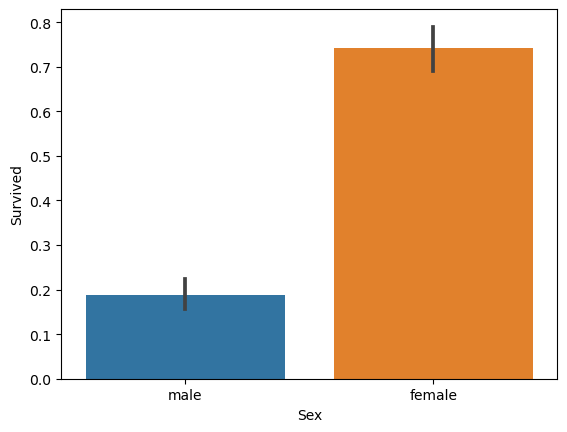

In [31]:
# Plot histogram of all the columns against those who survived or not
# Sex 
sns.barplot(df, x="Sex", y="Survived")

<Axes: xlabel='Pclass', ylabel='Survived'>

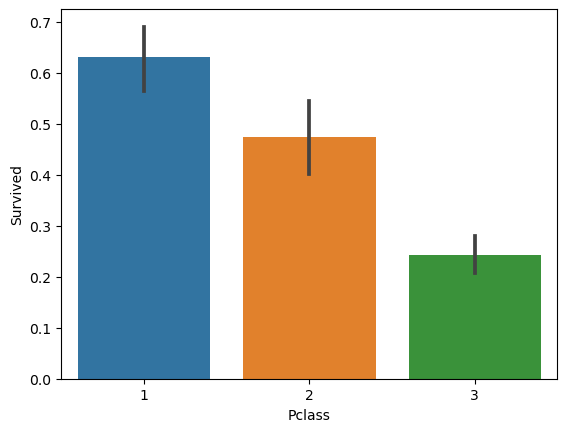

In [32]:
# Pclass
sns.barplot(df, x="Pclass", y="Survived")

<Axes: xlabel='SibSp', ylabel='Survived'>

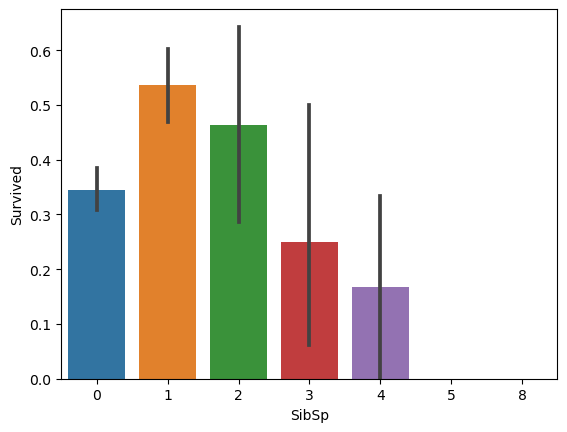

In [34]:
# SibSp
sns.barplot(df, x="SibSp", y="Survived")

<Axes: xlabel='Parch', ylabel='Survived'>

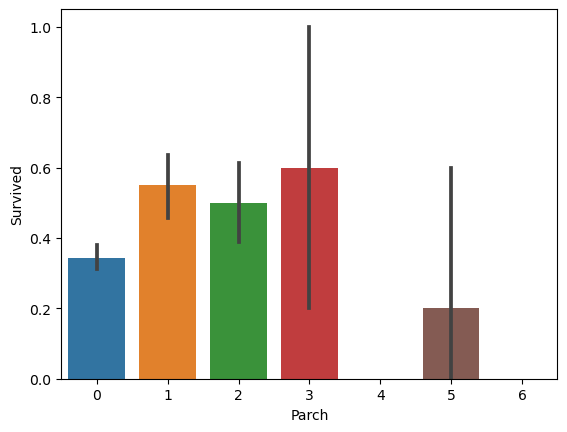

In [35]:
# Parch
sns.barplot(df, x="Parch", y="Survived")

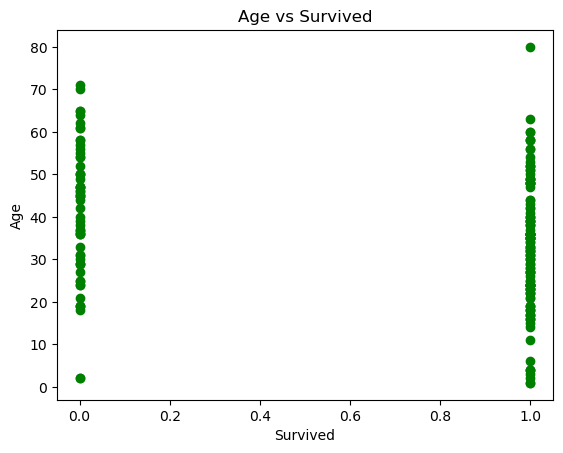

In [41]:
# Age
# Select rows from the dataframe for plotting 
x = age['Age'].values
y = age['Survived'].values

# Create scatterplot
plt.scatter(y,x,color = 'g')
plt.title('Age vs Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

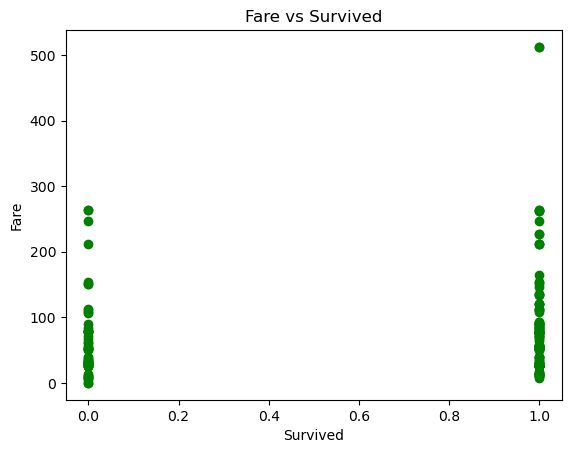

In [13]:
# Fare
x = age['Fare'].values
y = age['Survived'].values

# Create scatterplot
plt.scatter(y,x,color = 'g')
plt.title('Fare vs Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

In [ ]:
# Answers 
# 1.The most important factor in determining whether someone survives or not is the gendar as this has most 
# difference in the variables being particulary male and females 

# 2. We see that the first class passengers actually survived more than all the others, so it seems as if they were 
# in fact given preference

# 3. We see that the people who died where mainly above the age of 25 and also men so by this we can cleary see that 
# women and children were in fact given preference 

# The observation that I have made is that is that the lower the Sibsp that you have the more likely you will survive,
# however when you have no siblings or a wife then you will be less likely to survive that if you had two or less. This
# may be due to the fact that if you had no siblings then you had noone to help you, however if you had more 3 siblings 
# it was too difficult to leave them behind. 